In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl, plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
plt.style.use('./deeplearning.mplstyle')

In [46]:
# x_train is the input variable (size in 100 square meter)
# y_train is the target (price in 1000s of turkish lira)
x_train = np.array([1.0, 2.0, 3.0, 5.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 0.5, 1.0, 1.5, 2.5, 0.8, 1.8, 3.0, 4.0, 5.5, 6.5, 7.0, 7.5])
y_train = np.array([500.0, 2000.0, 3000.0, 10000.0, 1500.0, 5000.0, 8000.0, 12000.0, 15000.0, 20000.0, 100.0, 800.0, 1200.0, 3500.0, 900.0, 2500.0, 4000.0, 6000.0, 8500.0, 9000.0, 9500.0, 10000.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [ 1.   2.   3.   5.   2.   4.   6.   8.  10.  12.   0.5  1.   1.5  2.5
  0.8  1.8  3.   4.   5.5  6.5  7.   7.5]
y_train = [  500.  2000.  3000. 10000.  1500.  5000.  8000. 12000. 15000. 20000.
   100.   800.  1200.  3500.   900.  2500.  4000.  6000.  8500.  9000.
  9500. 10000.]


In [47]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (22,)
Number of training examples is: 22


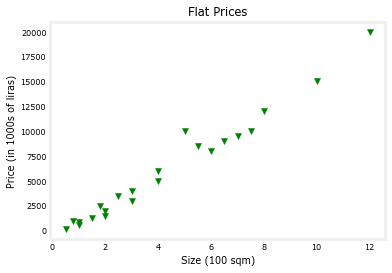

In [48]:
# Plot the data points
plt.scatter(x_train, y_train, marker='v', c='g')
# Set the title
plt.title("Flat Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of liras)')
# Set the x-axis label
plt.xlabel('Size (100 sqm)')
plt.show()

In [60]:
w = 1636
b = -990
print(f"w: {w}")
print(f"b: {b}")

w: 1636
b: -990


In [50]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

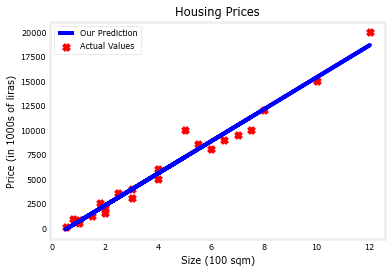

In [61]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of liras)')
# Set the x-axis label
plt.xlabel('Size (100 sqm)')
plt.legend()
plt.show()

In [52]:

#write a code that generates random number between 0 and 10
#need for loop code
for i in range(10):
    x_i = np.random.randint(1,10)
    cost_550sqft = w * x_i + b    
    print(f"{cost_550sqft:.0f}k ₺ is the estimate price for your {x_i} sqm house.")


3700k ₺ is the estimate price for your 3 sqm house.
12200k ₺ is the estimate price for your 8 sqm house.
8800k ₺ is the estimate price for your 6 sqm house.
2000k ₺ is the estimate price for your 2 sqm house.
3700k ₺ is the estimate price for your 3 sqm house.
12200k ₺ is the estimate price for your 8 sqm house.
10500k ₺ is the estimate price for your 7 sqm house.
7100k ₺ is the estimate price for your 5 sqm house.
5400k ₺ is the estimate price for your 4 sqm house.
12200k ₺ is the estimate price for your 8 sqm house.


In [62]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

print(f"Cost for w = 1700, b = -1400 is {compute_cost(x_train, y_train, w, b):.2f}")

Cost for w = 1700, b = -1400 is 382267.37


In [54]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=4000, step=10), Output()), _dom_classes=('widg…

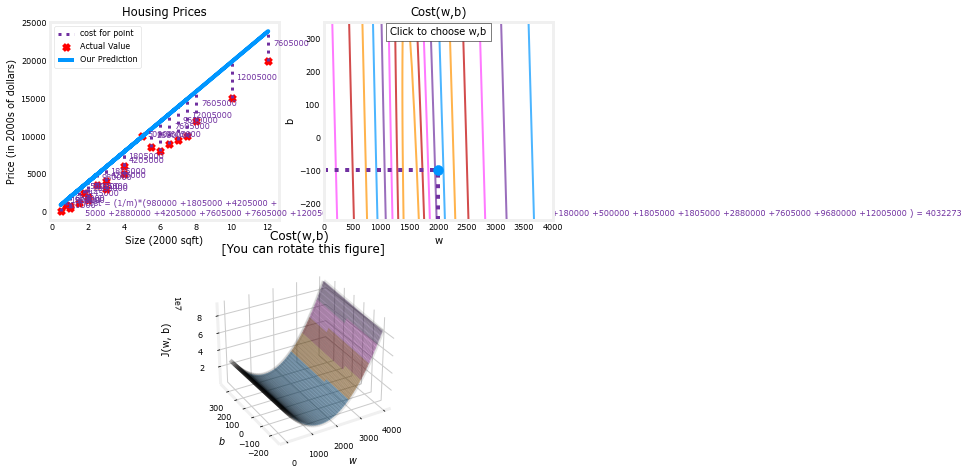

In [55]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

In [56]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

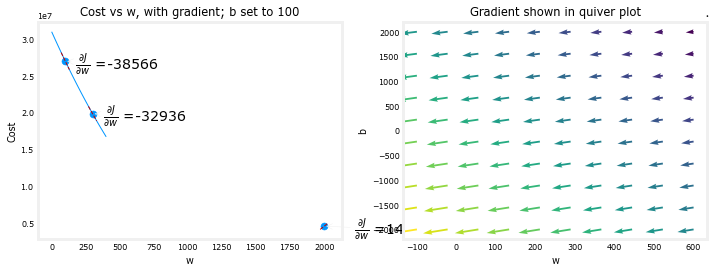

In [57]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [58]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [63]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.63e+07  dj_dw: -4.181e+04, dj_db: -6.045e+03   w:  4.181e+02, b: 6.04545e+01
Iteration 1000: Cost 3.83e+05  dj_dw: -2.192e+00, dj_db:  1.418e+01   w:  1.630e+03, b:-9.50352e+02
Iteration 2000: Cost 3.82e+05  dj_dw: -7.624e-02, dj_db:  4.932e-01   w:  1.637e+03, b:-9.91043e+02
Iteration 3000: Cost 3.82e+05  dj_dw: -2.651e-03, dj_db:  1.715e-02   w:  1.637e+03, b:-9.92458e+02
Iteration 4000: Cost 3.82e+05  dj_dw: -9.218e-05, dj_db:  5.963e-04   w:  1.637e+03, b:-9.92507e+02
Iteration 5000: Cost 3.82e+05  dj_dw: -3.205e-06, dj_db:  2.074e-05   w:  1.637e+03, b:-9.92509e+02
Iteration 6000: Cost 3.82e+05  dj_dw: -1.115e-07, dj_db:  7.211e-07   w:  1.637e+03, b:-9.92509e+02
Iteration 7000: Cost 3.82e+05  dj_dw: -3.876e-09, dj_db:  2.507e-08   w:  1.637e+03, b:-9.92509e+02
Iteration 8000: Cost 3.82e+05  dj_dw: -1.425e-10, dj_db:  8.710e-10   w:  1.637e+03, b:-9.92509e+02
Iteration 9000: Cost 3.82e+05  dj_dw: -9.260e-12, dj_db:  2.989e-11   w:  1.637e+03, b:-9.92509e+02


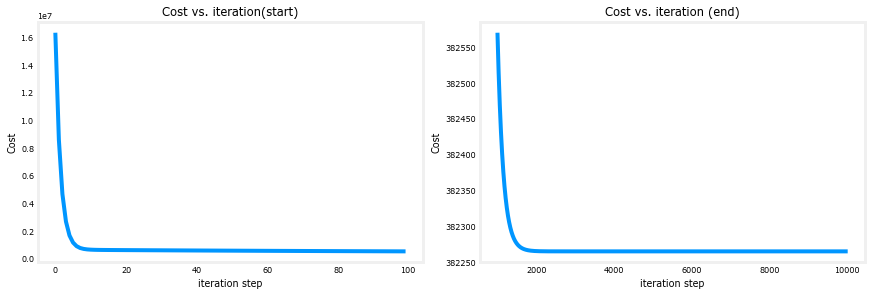

In [64]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [67]:
print(f"100 sqm house prediction {w_final*1.0 + b_final:0.1f} Thousand liras")
print(f"120 sqm house prediction {w_final*1.2 + b_final:0.1f} Thousand liras")
print(f"200 sqm house prediction {w_final*2.0 + b_final:0.1f} Thousand liras")

100 sqm house prediction 644.2 Thousand liras
1200 sqft house prediction 971.6 Thousand dollars
2000 sqft house prediction 2281.0 Thousand dollars
